 # Checkpoint 1: Data Cleaning 1

### 1. Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.


In [4]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plotter


In [5]:
#Reading rounds 2 data file
rounds2 =pd.read_csv(r'./data/rounds2.csv',encoding='palmos',low_memory=False)
rounds2.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
companies= pd.read_csv(r'./data/companies.txt',encoding='palmos',delimiter="\t",low_memory=False)
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


## Data check and cleaning 

In [7]:
print("No of Rows/observations and columns/attributes in companies data:" , companies.shape)
print("No of Rows/observations and columns/attributes in companies data:" , rounds2.shape)


No of Rows/observations and columns/attributes in companies data: (66368, 10)
No of Rows/observations and columns/attributes in companies data: (114949, 6)


In [8]:
#rounds 2 companies which are not in companies dataframe

company_name=  rounds2.loc[~rounds2['company_permalink'].isin(list(companies['permalink']))]
company_name.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [9]:
# converting both the dataframe in same upper case for combining data using unique ids.
companies['permalink_upr'] = companies['permalink'].str.upper()
rounds2['company_permalink_upr']=rounds2['company_permalink'].str.upper()
print(companies['permalink_upr'].head())
print(rounds2['company_permalink_upr'].head())

0                    /ORGANIZATION/-FAME
1                 /ORGANIZATION/-QOUNTER
2    /ORGANIZATION/-THE-ONE-OF-THEM-INC-
3                  /ORGANIZATION/0-6-COM
4         /ORGANIZATION/004-TECHNOLOGIES
Name: permalink_upr, dtype: object
0                    /ORGANIZATION/-FAME
1                 /ORGANIZATION/-QOUNTER
2                 /ORGANIZATION/-QOUNTER
3    /ORGANIZATION/-THE-ONE-OF-THEM-INC-
4                  /ORGANIZATION/0-6-COM
Name: company_permalink_upr, dtype: object


### Checking for null values on each column

In [10]:
#For companies data
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
permalink_upr        0
dtype: int64

In [11]:
# For rounds 2 data
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
company_permalink_upr          0
dtype: int64

### Checking for the % of missing values in each column

In [12]:
#checking for companies data
missing_comp=((companies.isnull() | companies.isna()).sum() * 100 / companies.index.size).round(2)   
missing_value_df = pd.DataFrame({'column_name': companies.columns,
                                 'percent_missing': missing_comp})

missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df = missing_value_df.reset_index(drop=True)


print("% missing value for companies data")
missing_value_df

% missing value for companies data


,column_name,percent_missing
0,founded_at,22.93
1,state_code,12.88
2,region,12.10
3,city,12.10
4,country_code,10.48
5,homepage_url,7.62
6,category_list,4.74
7,permalink,0.00
8,name,0.00
9,status,0.00


In [13]:
#checking for rounds2 data

percent_missing_round=((rounds2.isnull() | rounds2.isna()).sum() * 100 / rounds2.index.size).round(2)   
missing_value_df1 = pd.DataFrame({'column_name': rounds2.columns,
                                 'percent_missing': percent_missing_round})

missing_value_df1.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df1 = missing_value_df1.reset_index(drop=True)

print("% missing value for rounds2 data")
missing_value_df1

% missing value for rounds2 data


,column_name,percent_missing
0,funding_round_code,72.91
1,raised_amount_usd,17.39
2,company_permalink,0.00
3,funding_round_permalink,0.00
4,funding_round_type,0.00
5,funded_at,0.00
6,company_permalink_upr,0.00


<font color = blue > Since in rounds 2 table around 73% of data is not present in 'funding_round_code', we can drop that column .As per objective  of problem statement this attribute (funding_round_code) is not impacting as it is not used anywhere , so we can ignore this.</font>


###### How many unique companies are present in round 2

In [14]:
round2_unique_company=rounds2['company_permalink_upr'].nunique()
print(round2_unique_company)

66368


###### How many unique companies are present in companies?

In [15]:
Companies_unique_company=companies['permalink'].nunique()
print(Companies_unique_company)

66368


###### In the companies dataframe which column can be used as the unique keys for each company

In [16]:
print(companies.permalink.nunique())
print(companies.name.nunique())
print(companies.status.nunique())


66368
66102
4


<font color=blue> Since in null value count columns 'permalink' , 'name', 'status' are having 0 null values, After calculating unique counts for this column only column 'permalink' is having unique value=number of observation in datframe.</font>

###### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [17]:
company_name=  len(rounds2[~rounds2['company_permalink_upr'].isin(companies['permalink_upr'])])
print(company_name)

0


## Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [18]:
#checking data type of both the dataframes before merging
dtype_comp=companies.dtypes
dtype_round=rounds2.dtypes
print(dtype_comp)
print(dtype_round)

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
permalink_upr    object
dtype: object
company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
company_permalink_upr       object
dtype: object


In [19]:
#creating master dataframe
master_frame= companies.merge(rounds2, how='inner', left_on='permalink_upr', right_on='company_permalink_upr')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,permalink_upr,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_upr
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/0-6-COM,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM


In [20]:
print("No of Rows/observations and columns/attributes in companies data:" , master_frame.shape)


No of Rows/observations and columns/attributes in companies data: (114949, 18)


# Checkpoint 2: Funding Type Analysis

In [21]:
master_frame.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'permalink_upr', 'company_permalink', 'funding_round_permalink',
       'funding_round_type', 'funding_round_code', 'funded_at',
       'raised_amount_usd', 'company_permalink_upr'],
      dtype='object')

###### 1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

In [22]:
master_frame.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

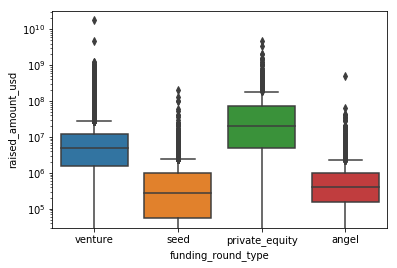

In [24]:
# Comparing raised amount usd among four funding types

list_type=['venture','seed','angel','private_equity']
Df_box=master_frame[master_frame['funding_round_type'].isin(list_type)]
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=Df_box)
plotter.yscale('log')
plotter.show()

<font color =blue>Private equity is having highest investment followed by venture, but investment should be between 5 to 15 million so we can go forward with venture type</font>

In [25]:
#master_frame.loc[master_frame['funding_round_type'].isin(['angel','seed','venture', 'private_equity'])].groupby(['funding_round_type']).mean().astype(np.int64).sort_values('raised_amount_usd', ascending=[False])
master_frame.groupby(['funding_round_type']).mean().sort_values('raised_amount_usd', ascending=[False])



,raised_amount_usd
funding_round_type,
post_ipo_debt,1.687046e+08
post_ipo_equity,8.218249e+07
secondary_market,7.964963e+07
private_equity,7.330859e+07
undisclosed,1.924237e+07
debt_financing,1.704353e+07
venture,1.174895e+07
grant,4.300576e+06
convertible_note,1.453439e+06


In [26]:
#Subsetting data for 4 funding type referred in question
Chosen_investment= master_frame.loc[master_frame['funding_round_type'].isin(['angel','seed','venture', 'private_equity'])].groupby(['funding_round_type']).mean().sort_values('raised_amount_usd', ascending=[False])
print("Investment type which is the most suitable for Spark Funds between 5 to 15 million dollar is  'Venture'")
Chosen_investment



Investment type which is the most suitable for Spark Funds between 5 to 15 million dollar is  'Venture'


,raised_amount_usd
funding_round_type,
private_equity,7.330859e+07
venture,1.174895e+07
angel,9.586945e+05
seed,7.198180e+05


# Checkpoint 3 : Country Analysis

###### 1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

###### Subsetting data based on Venture funding type

In [27]:
data_FT=master_frame[master_frame.funding_round_type=='venture']

###### 2.For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)



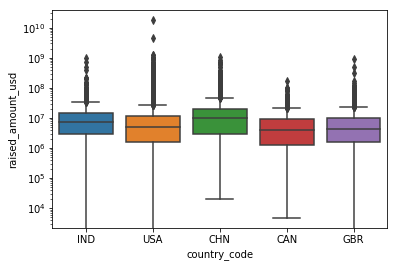

In [29]:
# Comparing raised amount usd among countries for chosen 'venture ' type
list_type=['USA','CHN','GBR','IND','CAN']
Df_box=data_FT[data_FT['country_code'].isin(list_type)]
sns.boxplot(x='country_code',y='raised_amount_usd',data=Df_box)
plotter.yscale('log')
plotter.show()

In [30]:
# Chosen investment type here is 'venture'

top9=data_FT.groupby('country_code').agg({'raised_amount_usd': np.sum}).sort_values('raised_amount_usd',ascending=False).head(9)
print("The top nine countries which have received the highest total funding across all sectors for chosen funding type 'venture' :"  )
print(top9)

The top nine countries which have received the highest total funding across all sectors for chosen funding type 'venture' :
              raised_amount_usd
country_code                   
USA                4.225108e+11
CHN                3.983542e+10
GBR                2.024563e+10
IND                1.439186e+10
CAN                9.583332e+09
FRA                7.259537e+09
ISR                6.907515e+09
DEU                6.346960e+09
JPN                3.363677e+09


###### Top 9 countries investment count

In [31]:
top9_country=data_FT[['country_code' ]].groupby('country_code').agg({'country_code':{'Total_number_of_investment': 'count'}})
top9_country.columns = top9_country.columns.droplevel(0)
top9_country.sort_values('Total_number_of_investment',ascending=False)[:9]

/Users/rashikumra/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Total_number_of_investment
country_code,
USA,38372
GBR,2303
CHN,2087
CAN,1346
IND,992
FRA,985
ISR,910
DEU,786
ESP,343


In [32]:
#Top 3 english speaking countries are United states, united kingdom and India
top9.loc[['USA','GBR','IND'] ].sort_values('raised_amount_usd',ascending=False)

,raised_amount_usd
country_code,
USA,4.225108e+11
GBR,2.024563e+10
IND,1.439186e+10


###### Subsetting data based Top 3 Country for the chosen venture type FT

In [33]:
data_top3_country=data_FT[data_FT['country_code'].isin(['USA','GBR','IND'])]
data_top3_country


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,permalink_upr,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_upr
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/ORGANIZATION/004-TECHNOLOGIES,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/ORGANIZATION/004-TECHNOLOGIES
10,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/ORGANIZATION/0XDATA
11,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/ORGANIZATION/0XDATA
12,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/ORGANIZATION/0XDATA
22,/Organization/1-Mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/ORGANIZATION/1-MAINSTREAM,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM
28,/Organization/10-Minutes-With,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/ORGANIZATION/10-MINUTES-WITH,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/ORGANIZATION/10-MINUTES-WITH
33,/Organization/1000Lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/ORGANIZATION/1000LOOKZ,/ORGANIZATION/1000LOOKZ,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN,/ORGANIZATION/1000LOOKZ
34,/Organization/1000Memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,/ORGANIZATION/1000MEMORIES,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,/ORGANIZATION/1000MEMORIES


# Checkpoint 4 : Sector Analysis 1

###### 1. Extract the primary sector of each category list from the category_list column and Assign it in seperate column primary_sector

In [34]:
mapping = pd.read_csv("./data/mapping.csv",low_memory=False)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [35]:
#converting A0lytics to Analytics, Fi0nce as in master_table to map it is analytics 
#and because of mismatching it was giving empty list
mapping['category_list']=mapping['category_list'].str.replace("0", "na") 
mapping['category_list'].head()


0              NaN
1               3D
2      3D Printing
3    3D Technology
4       Accounting
Name: category_list, dtype: object

In [36]:
data_top3_country['category_list']=data_top3_country['category_list'].str.replace("0", "na") 
data_top3_country['category_list'].head()

/Users/rashikumra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0                                                 Media
1     Application Platforms|Real Time|Social Network...
5                                              Software
10                                            Analytics
11                                            Analytics
Name: category_list, dtype: object

In [37]:
#converting A0lytics to Analytics as in master_table to map it is analytics 
#and because of mismatching it was giving empty list
#mapping['category_list']=mapping['category_list'].str.replace("A0lytics", "Analytics") 
#mapping['category_list']=mapping['category_list'].str.replace("Fi0nce", "Finance")
#mapping['category_list'].head()

In [38]:
#making catergory_list as index column
mapping=mapping.set_index('category_list')

In [39]:
data_top3_country['primary_sector'] = data_top3_country['category_list'].str.split('|').str[0]
data_top3_country['primary_sector'].head()

/Users/rashikumra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0                     Media
1     Application Platforms
5                  Software
10                Analytics
11                Analytics
Name: primary_sector, dtype: object

###### 2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [40]:
mapping.columns = mapping.columns.str.replace(' ', '_')
mapping.columns = mapping.columns.str.replace('/_', '')
mapping.columns = mapping.columns.str.replace(',', '')
mapping.columns = mapping.columns.str.replace('&_', '')
cols=mapping.columns
cols

Index(['Automotive_Sports', 'Blanks', 'Cleantech_Semiconductors',
       'Entertainment', 'Health', 'Manufacturing', 'News_Search_and_Messaging',
       'Others', 'Social_Finance_Analytics_Advertising'],
      dtype='object')

In [41]:
dict1={col:list(mapping[mapping[col]==1][col].index) for col in mapping.columns}

In [42]:
dict1

{'Automotive_Sports': ['Adventure Travel',
  'Aerospace',
  'Auto',
  'Automated Kiosk',
  'Automotive',
  'Bicycles',
  'Boating Industry',
  'CAD',
  'Cars',
  'Design',
  'Designers',
  'Drones',
  'Electric Vehicles',
  'Fuels',
  'Heavy Industry',
  'Industrial Automation',
  'Limousines',
  'Soccer',
  'Sporting Goods',
  'Sports',
  'Transportation',
  'Unmanned Air Systems'],
 'Blanks': [nan],
 'Cleantech_Semiconductors': ['Air Pollution Control',
  'Aquaculture',
  'Bio-Pharm',
  'Biofuels',
  'Bioinformatics',
  'Biomass Power Generation',
  'Biometrics',
  'Biotechnology',
  'Bitcoin',
  'Carbon',
  'Chemicals',
  'Clean Energy',
  'Clean Technology',
  'Clean Technology IT',
  'Commercial Solar',
  'Commodities',
  'Concentrated Solar Power',
  'Disruptive Models',
  'Early-Stage Technology',
  'Energy',
  'Energy Efficiency',
  'Energy IT',
  'Energy Management',
  'Energy Storage',
  'Environmental Innovation',
  'Fertility',
  'Fuel Cells',
  'Funeral Industry',
  'Gas',

###### 2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 

In [43]:
#Can be set to None, "warn", or "raise". "warn" is the default. 
#None will suppress the warning entirely, and "raise" will throw a SettingWithCopyError, preventing the operation from going through.
pd.options.mode.chained_assignment = None

data_top3_country['category']=data_top3_country[data_top3_country['category_list'].notnull()]['category_list'].map(lambda x: [key for key, value in dict1.items() if x.split("|")[0] in value  ])
data_top3_country['main_sector']=data_top3_country["category"].str.join(",") 
data_top3_country.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_upr,primary_sector,category,main_sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,Media,[Entertainment],Entertainment
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,...,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,Application Platforms,[News_Search_and_Messaging],News_Search_and_Messaging
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,...,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/ORGANIZATION/004-TECHNOLOGIES,Software,[Others],Others
10,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,Analytics,[Social_Finance_Analytics_Advertising],Social_Finance_Analytics_Advertising
11,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,Analytics,[Social_Finance_Analytics_Advertising],Social_Finance_Analytics_Advertising


# Checkpoint 5 Analysis 2

###### All the columns of the master_frame along with the primary sector and the main sector

In [44]:
D1_USA=data_top3_country[data_top3_country.country_code=='USA']
D1_USA.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_upr,primary_sector,category,main_sector
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,...,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,Application Platforms,[News_Search_and_Messaging],News_Search_and_Messaging
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,...,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/ORGANIZATION/004-TECHNOLOGIES,Software,[Others],Others
10,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,Analytics,[Social_Finance_Analytics_Advertising],Social_Finance_Analytics_Advertising
11,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,Analytics,[Social_Finance_Analytics_Advertising],Social_Finance_Analytics_Advertising
12,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,Analytics,[Social_Finance_Analytics_Advertising],Social_Finance_Analytics_Advertising


In [45]:
D2_GBR=data_top3_country[data_top3_country.country_code=='GBR']
D2_GBR

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_upr,primary_sector,category,main_sector
28,/Organization/10-Minutes-With,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,...,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/ORGANIZATION/10-MINUTES-WITH,Education,[Others],Others
368,/Organization/31Dover,31Dover,http://www.31dover.com,E-Commerce|Wine And Spirits,operating,GBR,H9,London,London,01-07-2012,...,/organization/31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,B,01-03-2014,2274716.0,/ORGANIZATION/31DOVER,E-Commerce,[Others],Others
401,/Organization/365Scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,...,/ORGANIZATION/365SCORES,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,/ORGANIZATION/365SCORES,Android,[Social_Finance_Analytics_Advertising],Social_Finance_Analytics_Advertising
402,/Organization/365Scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,...,/organization/365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,A,28-01-2013,1200000.0,/ORGANIZATION/365SCORES,Android,[Social_Finance_Analytics_Advertising],Social_Finance_Analytics_Advertising
550,/Organization/3Sun,3sun,http://3sungroup.com,Clean Technology,operating,GBR,I9,NaN,NaN,01-01-2007,...,/organization/3sun,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,NaN,03-03-2014,15152514.0,/ORGANIZATION/3SUN,Clean Technology,[Cleantech_Semiconductors],Cleantech_Semiconductors
665,/Organization/4Th-Office,4th Office,https://www.4thoffice.com,Office Space,operating,GBR,NaN,NaN,NaN,NaN,...,/ORGANIZATION/4TH-OFFICE,/funding-round/cb31013634b75ce3fd5f58de0c30ec6e,venture,B,03-12-2014,3607956.0,/ORGANIZATION/4TH-OFFICE,Office Space,[Others],Others
784,/Organization/60Mo,60mo,http://60mo.com,Accounting|Business Development|Finance|Softwa...,acquired,GBR,U8,Edinburgh,Edinburgh,01-06-2009,...,/organization/60mo,/funding-round/a6d521005229961ab858d840d9c80408,venture,A,19-01-2011,1000000.0,/ORGANIZATION/60MO,Accounting,[Social_Finance_Analytics_Advertising],Social_Finance_Analytics_Advertising
798,/Organization/6Ep,6EP,http://6ep.co.uk/,NaN,operating,GBR,H3,Leeds,Leeds,NaN,...,/organization/6ep,/funding-round/1b9514ecc790127b64c1bf1eefd2ce94,venture,NaN,01-07-2014,NaN,/ORGANIZATION/6EP,NaN,NaN,NaN
864,/Organization/7Digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,...,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,/ORGANIZATION/7DIGITAL,Content Creators,[Entertainment],Entertainment
865,/Organization/7Digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,...,/ORGANIZATION/7DIGITAL,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,/ORGANIZATION/7DIGITAL,Content Creators,[Entertainment],Entertainment


In [46]:
D3_IND=data_top3_country[data_top3_country.country_code=='IND']
D3_IND.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_upr,primary_sector,category,main_sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,Media,[Entertainment],Entertainment
33,/Organization/1000Lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,...,/ORGANIZATION/1000LOOKZ,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN,/ORGANIZATION/1000LOOKZ,Beauty,[Health],Health
227,/Organization/21Diamonds-India,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,...,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,/ORGANIZATION/21DIAMONDS-INDIA,E-Commerce,[Others],Others
265,/Organization/247-Learning-Private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,...,/ORGANIZATION/247-LEARNING-PRIVATE,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.0,/ORGANIZATION/247-LEARNING-PRIVATE,EdTech,[Others],Others
493,/Organization/3Dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,...,/ORGANIZATION/3DSOC,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.0,/ORGANIZATION/3DSOC,3D,[Manufacturing],Manufacturing


###### The total amount invested in each main sector in a separate column & The total number (or count) of investments for each main sector in a separate column

In [47]:

D1=D1_USA.groupby(['country_code','main_sector']).agg({'raised_amount_usd':{'raised_amount_usd_mean': 'mean'}, 'main_sector':{'main_sector_count':'count'}})
D1.columns=D1.columns.droplevel(0)
D1


raised_amount_usd_mean  \
country_code main_sector                                                    
USA                                                          9.501974e+06   
             Automotive_Sports                               2.303399e+07   
             Cleantech_Semiconductors                        1.512471e+07   
             Entertainment                                   9.484148e+06   
             Health                                          9.689525e+06   
             Manufacturing                                   1.012854e+07   
             News_Search_and_Messaging                       1.044589e+07   
             Others                                          9.961777e+06   
             Social_Finance_Analytics_Advertising            1.191435e+07   

                                                   main_sector_count  
country_code main_sector                                              
USA                                                              163  
             Automotive_Sports                                   566  
             Cleantech_Semiconductors                           8121  
             Entertainment                                      1927  
             Health                                             3413  
             Manufacturing                                      2643  
             News_Search_and_Messaging                          4612  
             Others                                             8767  
             Social_Finance_Analytics_Advertising               7822

In [48]:
#D1[:3]

###### Top 3 raised funding amount for country 1 USA

In [49]:
D1_USA1= D1_USA[['country_code','category_list','main_sector','raised_amount_usd']].groupby(['country_code','main_sector']).agg({'raised_amount_usd':  np.sum}).sort_values(['raised_amount_usd'],ascending=False)
D1_USA1[:6]

raised_amount_usd
country_code main_sector                                            
USA          Cleantech_Semiconductors                   1.188349e+11
             Social_Finance_Analytics_Advertising       8.633140e+10
             Others                                     8.282221e+10
             News_Search_and_Messaging                  4.543964e+10
             Health                                     3.167506e+10
             Manufacturing                              2.484532e+10

###### Top 3 main_category of country1 USA

In [50]:
D1_USA_cat= D1_USA[['country_code','category_list','main_sector','raised_amount_usd']].groupby(['country_code','main_sector']).size().sort_values(ascending=False)
USA=pd.DataFrame(D1_USA_cat)
USA.columns = ['count' ]
top3_USA = USA[:3]
top3_USA

count
country_code main_sector                                
USA          Others                                 8767
             Cleantech_Semiconductors               8121
             Social_Finance_Analytics_Advertising   7822

###### Top 3 main_category main sector investment count and total investment investment  for country 2 GBR

In [51]:
D2=D2_GBR.groupby(['country_code','main_sector']).agg({'raised_amount_usd':{'raised_amount_usd_mean': 'mean'}, 'main_sector':{'main_sector_count':'count'}})
D2.columns=D2.columns.droplevel(0)
D2


raised_amount_usd_mean  \
country_code main_sector                                                    
GBR                                                          1.483493e+07   
             Automotive_Sports                               1.092906e+07   
             Cleantech_Semiconductors                        1.156259e+07   
             Entertainment                                   8.548271e+06   
             Health                                          8.869956e+06   
             Manufacturing                                   8.354780e+06   
             News_Search_and_Messaging                       1.226566e+07   
             Others                                          8.705852e+06   
             Social_Finance_Analytics_Advertising            8.962776e+06   

                                                   main_sector_count  
country_code main_sector                                              
GBR                                                                7  
             Automotive_Sports                                    54  
             Cleantech_Semiconductors                            460  
             Entertainment                                       160  
             Health                                              126  
             Manufacturing                                       132  
             News_Search_and_Messaging                           265  
             Others                                              580  
             Social_Finance_Analytics_Advertising                481

###### Top 3 main_category total investment  for country 2 GBR

In [52]:
D2_GBR1= D2_GBR[['country_code','category_list','main_sector','raised_amount_usd']].groupby(['country_code','main_sector']).agg({'raised_amount_usd':  np.sum}).sort_values(['raised_amount_usd'],ascending=False)
D2_GBR1[:3]


raised_amount_usd
country_code main_sector                                            
GBR          Cleantech_Semiconductors                   5.052850e+09
             Others                                     4.492220e+09
             Social_Finance_Analytics_Advertising       3.773329e+09

In [53]:
###### Top 3 main_category main sector investment count  for country 2 GBR

In [54]:
D2_GBR_cat= D2_GBR[['country_code','category_list','main_sector','raised_amount_usd']].groupby(['country_code','main_sector']).size().sort_values(ascending=False)
GBR=pd.DataFrame(D2_GBR_cat)
GBR.columns = ['count' ]
top3_GBR=GBR[:3]
top3_GBR

count
country_code main_sector                                
GBR          Others                                  580
             Social_Finance_Analytics_Advertising    481
             Cleantech_Semiconductors                460

In [55]:
D3=D3_IND.groupby(['country_code','main_sector']).agg({'raised_amount_usd':{'raised_amount_usd_mean': 'mean'}, 'main_sector':{'main_sector_count':'count'}})
D3.columns=D3.columns.droplevel(0)
D3


raised_amount_usd_mean  \
country_code main_sector                                                    
IND          Automotive_Sports                               5.020484e+07   
             Cleantech_Semiconductors                        1.456379e+07   
             Entertainment                                   1.284463e+07   
             Health                                          1.343738e+07   
             Manufacturing                                   1.327745e+07   
             News_Search_and_Messaging                       1.338138e+07   
             Others                                          2.228700e+07   
             Social_Finance_Analytics_Advertising            1.074017e+07   

                                                   main_sector_count  
country_code main_sector                                              
IND          Automotive_Sports                                    32  
             Cleantech_Semiconductors                             63  
             Entertainment                                        90  
             Health                                               56  
             Manufacturing                                        64  
             News_Search_and_Messaging                           154  
             Others                                              332  
             Social_Finance_Analytics_Advertising                193

###### Top 3 main_category total investment  for country 3 IND

In [56]:
D3_IND1= D3_IND[['country_code','category_list','main_sector','raised_amount_usd']].groupby(['country_code','main_sector']).agg({'raised_amount_usd':  np.sum}).sort_values(['raised_amount_usd'],ascending=False)
D3_IND1[:3]


raised_amount_usd
country_code main_sector                                            
IND          Others                                     6.329507e+09
             News_Search_and_Messaging                  1.739580e+09
             Social_Finance_Analytics_Advertising       1.578805e+09

###### Top 3 main_category investment count for country 3 IND

In [57]:
D3_IND_cat= D3_IND[['country_code','category_list','main_sector','raised_amount_usd']].groupby(['country_code','main_sector']).size().sort_values(ascending=False)
IND=pd.DataFrame(D3_IND_cat)
IND.columns = ['count' ]
top3_IND=IND[:3]
top3_IND

count
country_code main_sector                                
IND          Others                                  332
             Social_Finance_Analytics_Advertising    193
             News_Search_and_Messaging               154

In [58]:
single_df = pd.concat([top3_USA,top3_GBR,top3_IND])
single_df

count
country_code main_sector                                
USA          Others                                 8767
             Cleantech_Semiconductors               8121
             Social_Finance_Analytics_Advertising   7822
GBR          Others                                  580
             Social_Finance_Analytics_Advertising    481
             Cleantech_Semiconductors                460
IND          Others                                  332
             Social_Finance_Analytics_Advertising    193
             News_Search_and_Messaging               154

In [59]:
D1_country1=D1.sort_values(['country_code','main_sector_count'], ascending=[True,False])[:3]
D2_countr2=D2.sort_values(['country_code','main_sector_count'], ascending=[True,False])[:3]
D3_Country3=D3.sort_values(['country_code','main_sector_count'], ascending=[True,False])[:3]

Final_data = pd.concat([D1_country1,D2_countr2,D3_Country3])
Final_data

raised_amount_usd_mean  \
country_code main_sector                                                    
USA          Others                                          9.961777e+06   
             Cleantech_Semiconductors                        1.512471e+07   
             Social_Finance_Analytics_Advertising            1.191435e+07   
GBR          Others                                          8.705852e+06   
             Social_Finance_Analytics_Advertising            8.962776e+06   
             Cleantech_Semiconductors                        1.156259e+07   
IND          Others                                          2.228700e+07   
             Social_Finance_Analytics_Advertising            1.074017e+07   
             News_Search_and_Messaging                       1.338138e+07   

                                                   main_sector_count  
country_code main_sector                                              
USA          Others                                             8767  
             Cleantech_Semiconductors                           8121  
             Social_Finance_Analytics_Advertising               7822  
GBR          Others                                              580  
             Social_Finance_Analytics_Advertising                481  
             Cleantech_Semiconductors                            460  
IND          Others                                              332  
             Social_Finance_Analytics_Advertising                193  
             News_Search_and_Messaging                           154

In [60]:
##### Which company received the highest investment for top sector , i.e others

In [61]:
USA_top_comp=data_top3_country[(data_top3_country['main_sector' ]=='Others') & (data_top3_country['country_code']=='USA' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})
GBR_top_comp=data_top3_country[(data_top3_country['main_sector' ]=='Others') & (data_top3_country['country_code']=='GBR' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})
IND_top_comp=data_top3_country[(data_top3_country['main_sector' ]=='Others') & (data_top3_country['country_code']=='IND' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})

USA_top_comp.columns = USA_top_comp.columns.droplevel(0)
GBR_top_comp.columns = GBR_top_comp.columns.droplevel(0)
IND_top_comp.columns = IND_top_comp.columns.droplevel(0)


In [62]:
USA_top_comp.sort_values('funding_amount',ascending=False)[:9]


,funding_amount
permalink,
/Organization/Social-Finance,1.365200e+09
/Organization/Snapchat,1.165100e+09
/Organization/Livingsocial,8.182250e+08
/Organization/Facebook,6.152000e+08
/Organization/Zenefits,5.815000e+08
/Organization/Coreexpress,5.730000e+08
/Organization/Jet,5.450000e+08
/Organization/Pure-Storage,4.700000e+08
/Organization/Social-Finance-Inc,3.980000e+08


In [63]:
GBR_top_comp.sort_values('funding_amount',ascending=False)[:9]

,funding_amount
permalink,
/Organization/Oneweb,500000000.0
/Organization/Farfetch,194500000.0
/Organization/Liquid-Telecom,150000000.0
/Organization/Picochip,111500000.0
/Organization/Newvoicemedia,111300000.0
/Organization/Six-Degrees-Group,106392886.0
/Organization/Myoptique-Group,102232479.0
/Organization/Onefinestay,80900000.0
/Organization/Silverrail-Technologies,69000000.0


In [64]:

IND_top_comp.sort_values('funding_amount',ascending=False)[:9]


,funding_amount
permalink,
/Organization/Flipkart,2.451000e+09
/Organization/Snapdeal,3.107000e+08
/Organization/Tata-Teleservices,2.120000e+08
/Organization/Myntra,1.587500e+08
/Organization/Pepperfry-Com,1.280000e+08
/Organization/Delhivery,1.275000e+08
/Organization/Oyo-Rooms,1.250000e+08
/Organization/Naaptol,1.062000e+08
/Organization/Igate-Patni-Computers,1.000000e+08


In [65]:
##### Which company received the second best investment for top sector , i.e others

In [66]:
USA_top2_comp=data_top3_country[(data_top3_country['main_sector' ]=='Cleantech_Semiconductors') & (data_top3_country['country_code']=='USA' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})
GBR_top2_comp=data_top3_country[(data_top3_country['main_sector' ]=='Social_Finance_Analytics_Advertising') & (data_top3_country['country_code']=='GBR' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})
IND_top2_comp=data_top3_country[(data_top3_country['main_sector' ]=='Social_Finance_Analytics_Advertising') & (data_top3_country['country_code']=='IND' )].groupby('permalink').agg({'raised_amount_usd':{'funding_amount': np.sum}})

USA_top2_comp.columns = USA_top2_comp.columns.droplevel(0)
GBR_top2_comp.columns = GBR_top2_comp.columns.droplevel(0)
IND_top2_comp.columns = IND_top2_comp.columns.droplevel(0)


In [67]:
USA_top2_comp.sort_values('funding_amount',ascending=False)[:9]


,funding_amount
permalink,
/Organization/Freescale,1.760000e+10
/Organization/Juno-Therapeutics,1.159803e+09
/Organization/Better-Place,7.750000e+08
/Organization/Brightsource-Energy,5.820000e+08
/Organization/Greatpoint-Energy,5.620000e+08
/Organization/Tenaska,5.500000e+08
/Organization/Stem-Centrx,4.735270e+08
/Organization/Invenergy,4.590000e+08
/Organization/Miasole,4.164000e+08


In [68]:
GBR_top2_comp.sort_values('funding_amount',ascending=False)[:9]

,funding_amount
permalink,
/Organization/Powa-Technologies,176700000.0
/Organization/Borro,171572758.0
/Organization/Worldremit,147109000.0
/Organization/Wonga,145393366.0
/Organization/Mereo,119000000.0
/Organization/Icrossing,108000000.0
/Organization/Transferwise,89000000.0
/Organization/Just-Eat,88988376.0
/Organization/Shopzilla,74500000.0


In [69]:
IND_top2_comp.sort_values('funding_amount',ascending=False)[:9]

,funding_amount
permalink,
/Organization/Shopclues-Com,129000000.0
/Organization/Ybrant-Digital,103000000.0
/Organization/Yepme-Com,88200000.0
/Organization/Bankbazaar,79000000.0
/Organization/Policybazaar,69600000.0
/Organization/Komli-Media,67000000.0
/Organization/Manthan-Software-Services,60000000.0
/Organization/Janalakshmi,57000000.0
/Organization/Manthan-Systems,56700000.0


# checkpoint 6

###### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [70]:

sns.set(style='darkgrid')
%matplotlib inline

Text(0, 0.5, 'Total Investment Count')

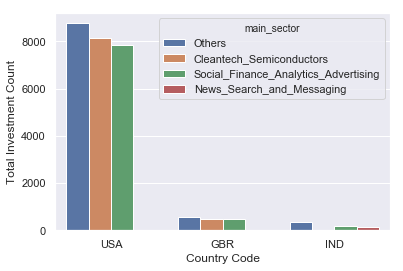

In [71]:
df_bar = single_df.reset_index().melt(id_vars=["country_code", "main_sector"])
#sns.barplot(x="country_code", y="count", hue="index", data=df_bar)
df_bar[['country_code','main_sector', 'value']]
plot_final=sns.barplot(x="country_code", y="value", hue="main_sector", data=df_bar)
plotter.xlabel('Country Code')
plotter.ylabel('Total Investment Count')
 


#### A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [72]:
# master_frame because we need to calculate globally
DF_stat = master_frame.groupby(['funding_round_type']).agg({'raised_amount_usd': {'Average': np.mean, 'Total': np.sum}})
DF_stat.columns=DF_stat.columns.droplevel(0) 
DF_stat


,Average,Total
funding_round_type,,
angel,9.586945e+05,4.659255e+09
convertible_note,1.453439e+06,2.103126e+09
debt_financing,1.704353e+07,1.138848e+11
equity_crowdfunding,5.383682e+05,6.611162e+08
grant,4.300576e+06,9.134424e+09
non_equity_assistance,4.112031e+05,3.001782e+07
post_ipo_debt,1.687046e+08,2.564309e+10
post_ipo_equity,8.218249e+07,5.161061e+10
private_equity,7.330859e+07,1.419254e+11


In [73]:


DF_stat = master_frame.groupby('funding_round_type').sum().sort_values('raised_amount_usd', ascending=[False])
DF_stat['fraction']=DF_stat['raised_amount_usd']*100/rounds2['raised_amount_usd'].sum()
DF_stat




,raised_amount_usd,fraction
funding_round_type,,
venture,5.901262e+11,59.601178
private_equity,1.419254e+11,14.334092
debt_financing,1.138848e+11,11.502066
post_ipo_equity,5.161061e+10,5.212534
undisclosed,3.044143e+10,3.074503
post_ipo_debt,2.564309e+10,2.589884
seed,1.698986e+10,1.715931
grant,9.134424e+09,0.922553
angel,4.659255e+09,0.470572



###### A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. 

In [74]:
DF_stat


,raised_amount_usd,fraction
funding_round_type,,
venture,5.901262e+11,59.601178
private_equity,1.419254e+11,14.334092
debt_financing,1.138848e+11,11.502066
post_ipo_equity,5.161061e+10,5.212534
undisclosed,3.044143e+10,3.074503
post_ipo_debt,2.564309e+10,2.589884
seed,1.698986e+10,1.715931
grant,9.134424e+09,0.922553
angel,4.659255e+09,0.470572


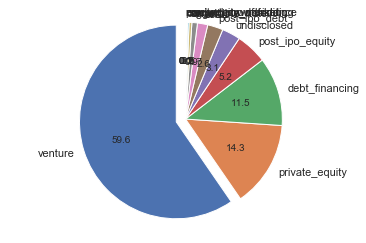

In [75]:


# The slice names of a population distribution pie chart

pieLabels = DF_stat.index

 

# Population data

populationShare     = DF_stat.fraction

 

figureObject, axesObject = plotter.subplots()

explodeTuple = (0.1, 0.0, 0.0, 0.0,0.0, 0.0, 0.0,0.0, 0.0, 0.0,0.0, 0.0, 0.0,0.0)

# Draw the pie chart

axesObject.pie(populationShare,explode=explodeTuple,

        labels=pieLabels,

        autopct='%1.1f',

        startangle=90)

 

# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')

 

plotter.show()



#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

Text(0, 0.5, 'Total Investment Amount (Million)')

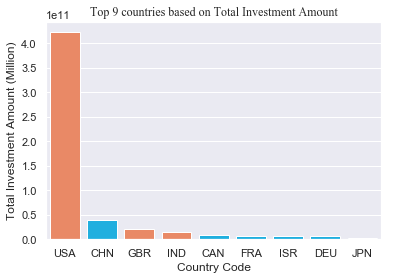

In [76]:
clrs = ['#FF7F50' if (x in ['USA','IND','GBR']) else '#00BFFF' for x in top9.index ]
sns.barplot(x=top9.index, y=top9.raised_amount_usd, palette=clrs) # color=clrs) 
plotter.title('Top 9 countries based on Total Investment Amount',fontname="Times New Roman",fontweight="bold")
plotter.xlabel('Country Code')
plotter.ylabel('Total Investment Amount (Million)')
 


#### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [77]:

#df_sort=Final_data.sort_values(['country_code','main_sector_count'], ascending=[True,False])

#df_sort['raised_amount_usd_mean'] = df_sort['raised_amount_usd_mean'].astype(np.int64)
#Sdf_sort

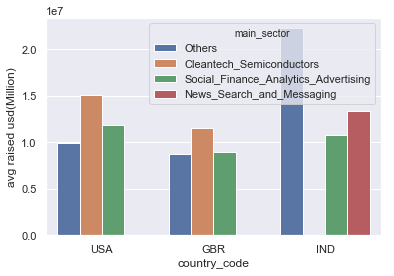

,country_code,main_sector,value
0,USA,Others,9.961777e+06
1,USA,Cleantech_Semiconductors,1.512471e+07
2,USA,Social_Finance_Analytics_Advertising,1.191435e+07
3,GBR,Others,8.705852e+06
4,GBR,Social_Finance_Analytics_Advertising,8.962776e+06
5,GBR,Cleantech_Semiconductors,1.156259e+07
6,IND,Others,2.228700e+07
7,IND,Social_Finance_Analytics_Advertising,1.074017e+07
8,IND,News_Search_and_Messaging,1.338138e+07


In [78]:
# replacing country name for proper order

chosen_FT_top3 = Final_data[['raised_amount_usd_mean']].reset_index().melt(id_vars=["country_code", "main_sector"])

g=sns.barplot(x="country_code", y="value", hue="main_sector", data=chosen_FT_top3)
plotter.ylabel("avg raised usd(Million)")
plotter.show(g)
 
chosen_FT_top3[['country_code','main_sector', 'value']]